In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPooling2D, Dropout, Flatten


import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

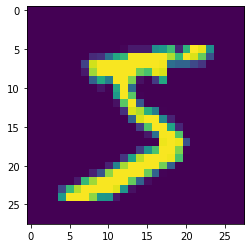

In [4]:
plt.imshow(x_train[0])

In [8]:
# model = tf.keras.mod
inputs = Input((28, 28, 1))

net = Conv2D(32, (3, 3), padding='same')(inputs) 
net = Activation('relu')(net)
net = Conv2D(32, (3, 3), padding='same')(inputs) 
net = Activation('relu')(net)
net = MaxPooling2D(pool_size=(2, 2))(net) 
net = Dropout(0.25)(net)

net = Conv2D(128, (3, 3), padding='same')(net) 
net = Activation('relu')(net)
net = Conv2D(128, (3, 3), padding='same')(net) 
net = Activation('relu')(net)
net = MaxPooling2D(pool_size=(2, 2))(net) 
net = Dropout(0.25)(net)

net = Flatten()(net) 
net = Dense(512)(net) 
net = Activation('relu')(net) 
net = Dropout(0.25)(net)
net = Dense(10)(net) 
net = Activation('softmax')(net) 

model = Model(inputs=inputs, outputs=net)

# net = Conv2D(128, (3, 3), padding='same')(net) 
# net = Activation('relu')(net)
# net = Conv2D(128, (3, 3), padding='same')(net) 


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       36992     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 128)       0     

In [10]:
lr = 0.01 
model.compile(optimizer=tf.keras.optimizers.Adam(lr)
            , loss='sparse_categorical_crossentropy'
            , metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=10, validation_split=0.25, batch_size=10)

Epoch 1/10
4500/4500 [==============================] - 152s 34ms/step - loss: 1.6742 - accuracy: 0.7542 - val_loss: 0.4842 - val_accuracy: 0.8416
Epoch 2/10
4500/4500 [==============================] - 158s 35ms/step - loss: 0.7848 - accuracy: 0.7476 - val_loss: 0.5188 - val_accuracy: 0.8195
Epoch 3/10
4500/4500 [==============================] - 146s 33ms/step - loss: 0.7158 - accuracy: 0.7668 - val_loss: 0.5343 - val_accuracy: 0.8293
Epoch 4/10
4500/4500 [==============================] - 149s 33ms/step - loss: 0.7353 - accuracy: 0.7590 - val_loss: 0.5063 - val_accuracy: 0.8351
Epoch 5/10
1613/4500 [=========>....................] - ETA: 1:36 - loss: 0.7017 - accuracy: 0.7696

KeyboardInterrupt: 

In [ ]:
model.evalute(x_train, y_train)

In [22]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000).batch(32) 

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32) 

In [23]:
train_loss = tf.keras.metrics.Mean()
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

test_loss = tf.keras.metrics.Mean()
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

In [24]:
# def loss_object(): 
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [25]:
@tf.function 
def train_step(images, label): 
    with tf.GradientTape() as tape: 
        prediction = model(images)
        loss = loss_object(label, prediction) 
    gradient = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradient, model.trainable_variables))

    train_loss(loss)
    train_accuracy(label, prediction)

In [26]:
@tf.function 
def test_step(images, label): 
    with tf.GradientTape() as tape: 
        prediction = model(images)
        t_loss = loss_object(label, prediction) 
    # gradient = tape.gradient(loss, model.trainable_variables)
    # optimizer.appy_gradient(zip(gradient, model.trainable_variables))

    test_loss(t_loss) 
    test_accuracy(label, prediction)

In [27]:
for epoch in range(10): 

    for images, label in train_ds: 
        train_step(images, label) 

    for images, label in test_ds: 
        test_step(images, label) 

    temp = 'epoch : {}, loss : {}, accuracy : {}, test_loss : {}, test_accuracy : {}'
    print(temp.format(epoch+1
                    , train_loss.result() 
                    , train_accuracy.result() * 100 
                    , test_loss.result() 
                    , test_accuracy.result() * 100))


epoch : 1, loss : 2.3007915019989014, accuracy : 11.78833293914795, test_loss : 2.298938512802124, test_accuracy : 13.699999809265137
epoch : 2, loss : 2.0655930042266846, accuracy : 22.199167251586914, test_loss : 1.555168628692627, test_accuracy : 43.30999755859375
epoch : 3, loss : 1.6213829517364502, accuracy : 39.823890686035156, test_loss : 1.2673311233520508, test_accuracy : 54.45000076293945
epoch : 4, loss : 1.3771734237670898, accuracy : 49.37458419799805, test_loss : 1.1090033054351807, test_accuracy : 60.49500274658203
epoch : 5, loss : 1.219873070716858, accuracy : 55.492000579833984, test_loss : 1.0120010375976562, test_accuracy : 64.11199951171875
epoch : 6, loss : 1.1092227697372437, accuracy : 59.7400016784668, test_loss : 0.9393016695976257, test_accuracy : 66.88999938964844
epoch : 7, loss : 1.0265611410140991, accuracy : 62.89047622680664, test_loss : 0.8856035470962524, test_accuracy : 68.894287109375
epoch : 8, loss : 0.9620386958122253, accuracy : 65.330001831054

## MobileNet 적용

In [2]:
# import tensorflow as tf
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

mobilenetv2 = MobileNetV2()

In [3]:
for layer in mobilenetv2.layers[:-1]:
    layer.trainable = True

In [4]:
for layer in mobilenetv2.layers[:-1]:
    if 'kernel' in layer.__dict__: 
        kernel_shape = np.array(layer.get_weights()).shape

        layer.set_weights(tf.random.normal(kernel_shape, 0, 1))

In [5]:
mobilenetv2.layers 

In [6]:
# test = tf.convert_to_tensor(x_train[..., tf.newaxis])
# test.shape 

In [7]:
mobilenetv2_model = tf.keras.applications.MobileNetV2(
    input_shape=(32, 32, 3), 
    weights='imagenet',
    include_top=False
)

In [8]:
inputs = tf.keras.layers.Input((28, 28, 3))
# inputs = mobilenetv2.input
net = mobilenetv2.layers[:-2]
net = tf.keras.layers.Dense(10, activation='softmax')(net) 

mobilenetv2_model = tf.keras.Model(inputs=inputs, outputs=net)
mobilenetv2_model.summary()

TypeError: Inputs to a layer should be tensors. Got: <keras.engine.input_layer.InputLayer object at 0x00000296F4B0A7C0>